In [2]:
import numpy as np
np.random.seed(123)
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Embedding, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from IPython.display import clear_output

c:\users\apple\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 1)


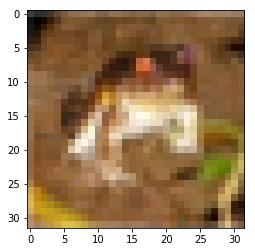

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_test.shape)
plt.imshow(x_train[0])

In [4]:
num_classes = 10
batch_size = 32
epochs = 20
num_predictions = 20

In [5]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

(50000, 10)


In [7]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

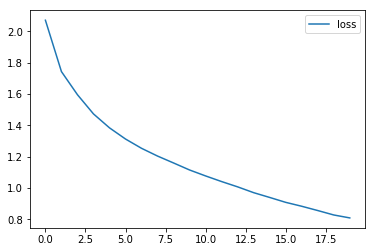

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

#alternative optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),shuffle=True, callbacks=[plot_losses])

In [ ]:
#try another optimization method
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),shuffle=True, callbacks=[plot_losses])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 3200/50000 [>.............................] - ETA: 4:33 - loss: 0.7611 - acc: 0.7284

In [10]:
scores = model.evaluate(x_test, y_test)
print("Loss:", scores[0])
print("Accuracy", scores[1])

10000/10000 [==============================] - 19s 2ms/step
Loss: 0.7655771960258484
Accuracy 0.7327


In [12]:
y_predict = model.predict(x_test)

from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_predict,y_test)
print("Confusion matrix")
print(m)

ImportError: No module named 'sklearn'